In [1]:
import pandas as pd
import os
from glob import glob
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

In [2]:
if not os.path.exists('output'):
    os.makedirs('output')

In [3]:
basedir = 'dati-andamento-nazionale'

In [4]:
date = []
daily_infected_total = np.array([])
daily_infected_variation = np.array([])
intensive_care = np.array([])

for elem in sorted(glob(os.path.join(basedir, 'dpc-covid19-ita-andamento-nazionale-2020*.csv'))):
    csv_df = pd.read_csv(elem)
    #print(elem)
    
    date.append(elem.split('-')[-1].replace('.csv', ''))
    daily_infected_total = np.append(daily_infected_total, csv_df['nuovi_positivi'])
    daily_infected_variation = np.append(daily_infected_variation, csv_df['variazione_totale_positivi'])
    intensive_care = np.append(intensive_care, csv_df['terapia_intensiva'])

In [36]:
date_dict = [
    ('Feb', 29),
    ('Mar', 31),
    ('Apr', 30),
    ('May', 31),
    ('June', 30)
    ]

In [37]:
date_array = []
for month, days in date_dict:
    for day in range(1, days+1):
        date_array.append('{month} {day}'.format(month=month, day=day))

In [38]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def exp_function(x, a, t):
    return a*np.exp(x/t)

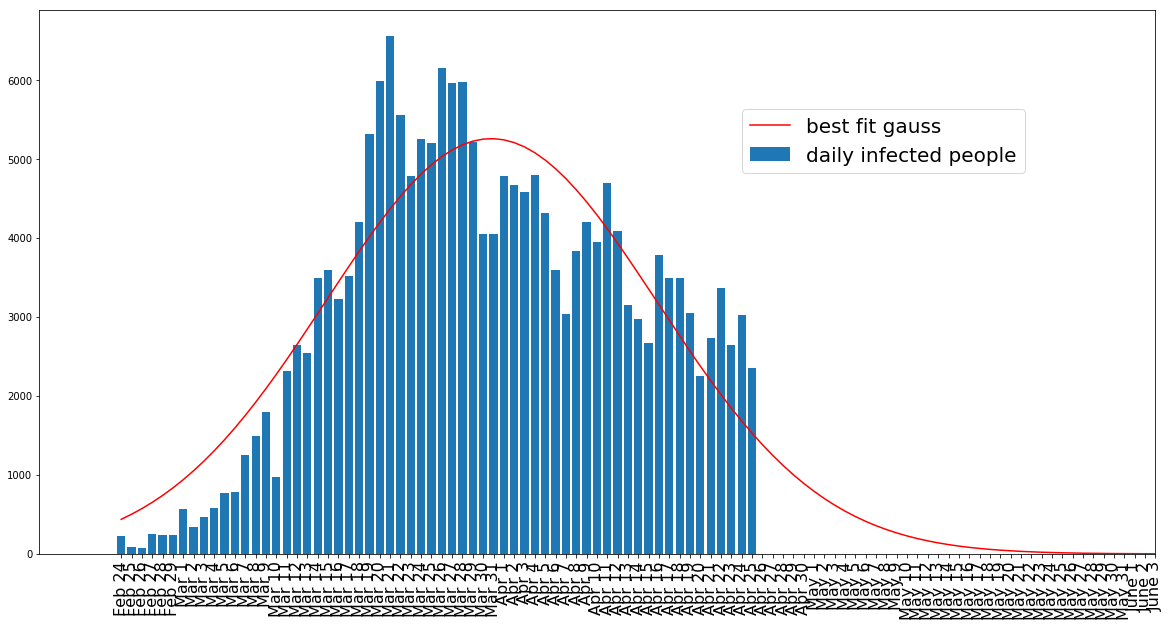

In [40]:
# ***************** Totale Positivi ************************
# (ricoverati_con_sintomi + terapia_intensiva + isolamento domiciliare)

gauss_popt, gauss_pcov = opt.curve_fit(gauss_function, range(len(date)), daily_infected_total, p0 = [1, 30, 2])
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(range(len(date)), daily_infected_total, label='daily infected people')
ax.plot(range(len(date_array)), gauss_function(range(len(date_array)), *gauss_popt), color='red', label='best fit gauss')
#ax.plot(range(20), gauss_function(range(20), *gauss_popt), color='red', label='best fit gauss')
#ax.bar(range(20), daily_infected_total[:20], label='daily infected people')
#ax.plot(range(20), fin_func(range(20), *complex_popt), color='green', label='best fit exp')


ax.set_xticks(range(len(date_array)))
ax.set_xticklabels(date_array[23:], rotation = 90, fontsize=16)
ax.set_xlim(right=100)

plt.legend(loc=(0.63, 0.7), fontsize=20)

fig.savefig('output/infected_total_trend.png')

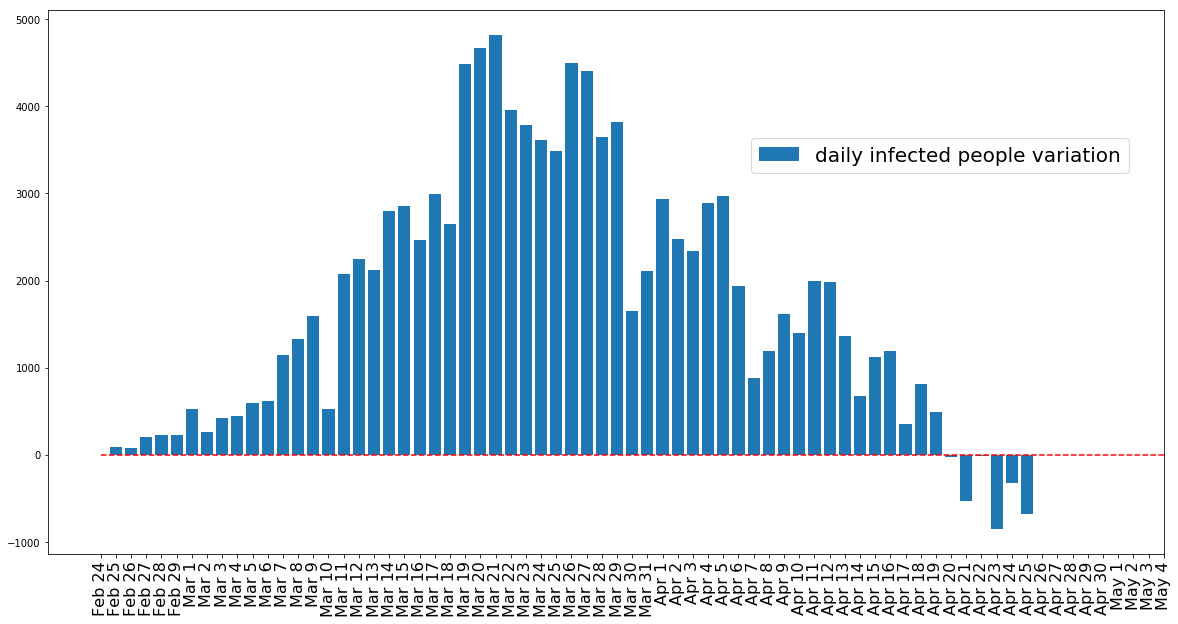

In [44]:
# ********************* Variazione Totale Positivi ******************************
# (totale_attualmente positivi giorno corrente - totale_attualmente positivi giorno precedente)

popt, pcov = opt.curve_fit(gauss_function, range(len(date)), daily_infected_variation, p0 = [1, 30, 2]) 
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(range(len(date)), daily_infected_variation, label='daily infected people variation')
#ax.plot(range(len(date_array)), gauss_function(range(len(date_array)), *popt), color='red', label='best fit')

ax.set_xticks(range(len(date_array)))
ax.set_xticklabels(date_array[23:], rotation = 90, fontsize=16)
ax.set_xlim(right=70)
ax.hlines(0, 0, 70, 'red', '--')

plt.legend(loc=(0.63, 0.7), fontsize=20)

fig.savefig('output/infected_variation_trend.png')

In [31]:
string = ' Daily Infected '.center(50, "*")

print('%s\n' % string)
print('Daily total: {value:14}'.format(value=daily_infected_total[-1]))
print('Daily variation: {value:10}'.format(value=daily_infected_variation[-1]))

***************** Daily Infected *****************

Daily total:         2357.0
Daily variation:     -680.0
